In [1]:
!wget "https://www.ncei.noaa.gov/orders/cdo/2164746.csv"

--2020-05-28 23:10:00--  https://www.ncei.noaa.gov/orders/cdo/2164746.csv
Resolving www.ncei.noaa.gov (www.ncei.noaa.gov)... 205.167.25.177, 205.167.25.178, 205.167.25.171, ...
Connecting to www.ncei.noaa.gov (www.ncei.noaa.gov)|205.167.25.177|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19793742 (19M) [text/csv]
Saving to: ‘2164746.csv’

2164746.csv         100%[===================>]  18.88M  3.48MB/s    in 13s     

2020-05-28 23:10:14 (1.45 MB/s) - ‘2164746.csv’ saved [19793742/19793742]



In [1]:
import pandas as pd
import numpy as np
pd.set_option('max_columns', None)
from tqdm.notebook import tqdm

In [2]:
df = pd.read_csv('WeatherScape1.csv')

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (7,9,11,13,15,17,19,21,25,27,29,31,33,41,43,45,47,49,51,53,55,57,59,61,63,65,67,69,71,73,75,77,79,81,83,85,87,89,91,93,95,97,99) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
print(df.NAME.unique())

['REDMOND AIRPORT, OR US' 'TERREBONNE 9.4 NW, OR US' 'BEND 2.4 NW, OR US'
 'TERREBONNE 9 NW, OR US' 'SISTERS, OR US' 'SISTERS 3.2 ENE, OR US'
 'BEND 2 NW, OR US' 'BEND 10.2 WSW, OR US' 'SISTERS 2.0 WNW, OR US'
 'COLGATE OREGON, OR US' 'BEND 3.0 NNE, OR US' 'BEND 2.7 E, OR US'
 'BEND 2.3 WNW, OR US' 'BEND 5.1 NNW, OR US' 'TUMALO RIDGE OREGON, OR US'
 'BEND, OR US' 'REDMOND 2.9 NNW, OR US' 'BEND 7 NE, OR US'
 'BEND 2.5 NW, OR US' 'REDMOND 1.3 WNW, OR US' 'SISTERS 2.6 WNW, OR US'
 'BEND 0.8 ESE, OR US' 'REDMOND 5.4 NNW, OR US' 'BEND 6.3 N, OR US'
 'REDMOND 2.1 N, OR US' 'REDMOND 1.8 WSW, OR US' 'BEND 1.5 WSW, OR US'
 'REDMOND AIR CENTER, OR US']


In [4]:
df.columns = map(str.lower, df.columns)
print(df.columns)

Index(['station', 'name', 'latitude', 'longitude', 'elevation', 'date', 'awnd',
       'awnd_attributes', 'daev', 'daev_attributes', 'dapr', 'dapr_attributes',
       'dasf', 'dasf_attributes', 'dawm', 'dawm_attributes', 'evap',
       'evap_attributes', 'fmtm', 'fmtm_attributes', 'mdev', 'mdev_attributes',
       'mdpr', 'mdpr_attributes', 'mdsf', 'mdsf_attributes', 'mdwm',
       'mdwm_attributes', 'mnpn', 'mnpn_attributes', 'mxpn', 'mxpn_attributes',
       'pgtm', 'pgtm_attributes', 'prcp', 'prcp_attributes', 'snow',
       'snow_attributes', 'snwd', 'snwd_attributes', 'tavg', 'tavg_attributes',
       'tmax', 'tmax_attributes', 'tmin', 'tmin_attributes', 'tobs',
       'tobs_attributes', 'tsun', 'tsun_attributes', 'wdf2', 'wdf2_attributes',
       'wdf5', 'wdf5_attributes', 'wdmv', 'wdmv_attributes', 'wesd',
       'wesd_attributes', 'wesf', 'wesf_attributes', 'wsf2', 'wsf2_attributes',
       'wsf5', 'wsf5_attributes', 'wt01', 'wt01_attributes', 'wt02',
       'wt02_attributes', 

In [6]:
df.describe()

,latitude,longitude,elevation,awnd,daev,dapr,dasf,dawm,evap,fmtm,mdev,mdpr,mdsf,mdwm,mnpn,mxpn,pgtm,prcp,snow,snwd,tavg,tmax,tmin,tobs,tsun,wdf2,wdf5,wdmv,wesd,wesf,wsf2,wsf5,wt01,wt02,wt03,wt04,wt05,wt06,wt07,wt08,wt09,wt11,wt13,wt15,wt16,wt17,wt18,wt19,wt22,wv03
count,89287.000000,89287.000000,89287.000000,7331.000000,10.000000,1109.000000,2.000000,12.0,3722.000000,4210.000000,10.000000,1153.000000,6.000000,12.000000,3659.000000,3659.000000,4003.000000,71468.000000,54245.000000,31262.000000,19969.000000,50425.000000,50303.000000,22537.000000,1174.0,7331.000000,7315.000000,3306.000000,370.000000,787.000000,7331.000000,7315.000000,1360.0,280.0,243.0,16.0,292.0,50.0,27.0,536.0,31.0,9.0,693.0,1.0,1565.0,22.0,495.0,99.0,176.0,42.0
mean,44.197410,-121.348705,1023.321219,6.455725,2.100000,4.399459,3.000000,2.0,0.252654,1598.770309,0.230000,0.171882,1.716667,90.416667,47.079803,73.726701,1473.893330,0.030736,0.092285,0.701184,47.063198,61.460089,33.029501,42.323912,0.0,268.157141,261.907040,67.554174,0.208108,0.130114,18.228809,23.304593,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
std,0.116661,0.156302,100.599232,2.698615,0.316228,4.587501,1.414214,0.0,0.804076,930.317428,0.094868,0.323048,1.254235,53.404662,8.594833,11.659755,440.495529,0.109155,0.699900,2.995028,14.442599,17.934215,11.690348,14.574907,0.0,85.085627,90.037589,438.900140,0.471162,0.236913,5.912100,7.834595,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0
min,44.036553,-121.605600,806.800000,0.000000,2.000000,2.000000,2.000000,2.0,0.000000,1.000000,0.100000,0.000000,0.310000,39.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-8.000000,-1.000000,-28.000000,-19.000000,0.0,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
25%,44.070400,-121.511897,947.600000,4.700000,2.000000,2.000000,2.500000,2.0,0.150000,1402.000000,0.200000,0.000000,0.627500,58.750000,41.000000,66.000000,1329.000000,0.000000,0.000000,0.000000,36.000000,47.000000,26.000000,32.000000,0.0,210.000000,200.000000,34.200000,0.000000,0.000000,14.100000,17.900000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
50%,44.255800,-121.338490,999.700000,6.040000,2.000000,3.000000,3.000000,2.0,0.230000,1606.000000,0.200000,0.030000,1.750000,76.450000,48.000000,76.000000,1535.000000,0.000000,0.000000,0.000000,45.000000,60.000000,32.000000,41.000000,0.0,300.000000,300.000000,44.700000,0.000000,0.000000,17.900000,23.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
75%,44.302212,-121.210200,1115.600000,7.610000,2.000000,4.000000,3.500000,2.0,0.300000,1740.000000,0.300000,0.200000,2.872500,94.125000,53.000000,82.000000,1713.000000,0.000000,0.000000,0.000000,58.000000,76.000000,41.000000,52.000000,0.0,330.000000,330.000000,55.900000,0.200000,0.100000,21.900000,28.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
max,44.449458,-121.139200,1434.100000,19.010000,3.000000,62.000000,4.000000,2.0,30.000000,9999.000000,0.400000,2.600000,2.990000,198.200000,80.000000,100.000000,2359.000000,3.400000,30.000000,100.000000,107.000000,117.000000,104.000000,106.000000,0.0,360.000000,360.000000,14935.300000,5.500000,1.900000,45.000000,64.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [5]:
df.date = pd.to_datetime(df.date)

In [8]:
df.date.loc[df.date == pd.to_datetime('1999-03-24')]

1006    1999-03-24
13857   1999-03-24
29272   1999-03-24
53786   1999-03-24
63704   1999-03-24
Name: date, dtype: datetime64[ns]

In [20]:
trange = pd.Timedelta(value = 15, unit='days')
send_date = pd.to_datetime('1995-03-24')

In [21]:
df.date.loc[(df.date < send_date) & (df.date >= send_date - trange)]

36      1995-03-09
37      1995-03-10
38      1995-03-11
39      1995-03-12
40      1995-03-13
           ...    
62393   1995-03-18
62394   1995-03-19
62395   1995-03-20
62396   1995-03-22
62397   1995-03-23
Name: DATE, Length: 74, dtype: datetime64[ns]

In [28]:
extract_recent_past(df, send_date, time_range=15).dropna(axis=1,how='all')

,station,name,latitude,longitude,elevation,date,dapr,dapr_attributes,mdpr,mdpr_attributes,prcp,prcp_attributes,snow,snow_attributes,snwd,snwd_attributes,tavg,tavg_attributes,tmax,tmax_attributes,tmin,tmin_attributes,tobs,tobs_attributes,wt01,wt01_attributes,wt02,wt02_attributes,wt08,wt08_attributes,wt16,wt16_attributes,wt18,wt18_attributes
36,USW00024230,"REDMOND AIRPORT, OR US",44.2558,-121.1392,927.5,1995-03-09,NaN,NaN,NaN,NaN,0.00,"T,,0,2400",0.0,",,0",0.0,",,0",NaN,NaN,61.0,",,0",41.0,",,0",NaN,NaN,NaN,NaN,NaN,NaN,1.0,",,0",1.0,",,0",NaN,NaN
37,USW00024230,"REDMOND AIRPORT, OR US",44.2558,-121.1392,927.5,1995-03-10,NaN,NaN,NaN,NaN,0.02,",,0,2400",0.0,",,0",0.0,",,0",NaN,NaN,56.0,",,0",38.0,",,0",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,",,0",NaN,NaN
38,USW00024230,"REDMOND AIRPORT, OR US",44.2558,-121.1392,927.5,1995-03-11,NaN,NaN,NaN,NaN,0.02,",,0,2400",0.0,",,0",0.0,",,0",NaN,NaN,55.0,",,0",33.0,",,0",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,",,0",NaN,NaN
39,USW00024230,"REDMOND AIRPORT, OR US",44.2558,-121.1392,927.5,1995-03-12,NaN,NaN,NaN,NaN,0.08,",,0,2400",0.0,",,0",0.0,",,0",NaN,NaN,50.0,",,0",29.0,",,0",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,",,0",NaN,NaN
40,USW00024230,"REDMOND AIRPORT, OR US",44.2558,-121.1392,927.5,1995-03-13,NaN,NaN,NaN,NaN,0.00,",,0,2400",0.0,",,0",0.0,",,0",NaN,NaN,56.0,",,0",40.0,",,0",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62393,USC00350699,"BEND 7 NE, OR US",44.1184,-121.2102,1023.5,1995-03-18,NaN,NaN,NaN,NaN,0.19,",,0,0730",0.0,"P,,0,",0.0,"P,,0,",NaN,NaN,67.0,",,0",40.0,",,0",45.0,",,0,0730",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62394,USC00350699,"BEND 7 NE, OR US",44.1184,-121.2102,1023.5,1995-03-19,NaN,NaN,NaN,NaN,0.00,"P,,0,0730",0.0,"P,,0,",0.0,"P,,0,",NaN,NaN,56.0,",,0",28.0,",,0",42.0,",,0,0730",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62395,USC00350699,"BEND 7 NE, OR US",44.1184,-121.2102,1023.5,1995-03-20,NaN,NaN,NaN,NaN,0.00,"P,,0,0730",0.0,"P,,0,",0.0,"P,,0,",NaN,NaN,50.0,",,0",43.0,",,0",47.0,",,0,0730",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62396,USC00350699,"BEND 7 NE, OR US",44.1184,-121.2102,1023.5,1995-03-22,2.0,",,0",0.02,",,0",NaN,NaN,NaN,NaN,0.0,"T,,0,",NaN,NaN,53.0,",,0",26.0,",,0",34.0,",,0,0730",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
rdm_df = df[df['station']=='USW00024230']
#tbstations = df['station'].loc[df['name'].str.contains('TERREBONNE')].unique()
tbn_df = df[df['name'].str.contains('TERREBONNE')]

In [43]:
tbn_df.tmax

8731    NaN
8732    NaN
8733    NaN
8734    NaN
8735    NaN
         ..
12341   NaN
12342   NaN
12343   NaN
12344   NaN
12345   NaN
Name: tmax, Length: 2921, dtype: float64

In [34]:
rdm_df.dropna(axis=1,how='all').columns

Index(['station', 'name', 'latitude', 'longitude', 'elevation', 'date', 'awnd',
       'awnd_attributes', 'dapr', 'dapr_attributes', 'fmtm', 'fmtm_attributes',
       'mdpr', 'mdpr_attributes', 'pgtm', 'pgtm_attributes', 'prcp',
       'prcp_attributes', 'snow', 'snow_attributes', 'snwd', 'snwd_attributes',
       'tavg', 'tavg_attributes', 'tmax', 'tmax_attributes', 'tmin',
       'tmin_attributes', 'tobs', 'tobs_attributes', 'tsun', 'tsun_attributes',
       'wdf2', 'wdf2_attributes', 'wdf5', 'wdf5_attributes', 'wsf2',
       'wsf2_attributes', 'wsf5', 'wsf5_attributes', 'wt01', 'wt01_attributes',
       'wt02', 'wt02_attributes', 'wt03', 'wt03_attributes', 'wt04',
       'wt04_attributes', 'wt05', 'wt05_attributes', 'wt06', 'wt06_attributes',
       'wt07', 'wt07_attributes', 'wt08', 'wt08_attributes', 'wt09',
       'wt09_attributes', 'wt11', 'wt11_attributes', 'wt13', 'wt13_attributes',
       'wt15', 'wt15_attributes', 'wt16', 'wt16_attributes', 'wt17',
       'wt17_attributes', 

In [7]:
keeps = ['station','name','latitude','longitude','date','awnd','prcp','snow','tmax','tmin']

In [8]:
rdm_keep = rdm_df[keeps].dropna(axis=1,how='all').copy()
rdm_keep

,station,name,latitude,longitude,date,awnd,prcp,snow,tmax,tmin
0,USW00024230,"REDMOND AIRPORT, OR US",44.2558,-121.1392,1995-02-01,NaN,0.36,0.0,52.0,37.0
1,USW00024230,"REDMOND AIRPORT, OR US",44.2558,-121.1392,1995-02-02,NaN,0.00,0.0,59.0,30.0
2,USW00024230,"REDMOND AIRPORT, OR US",44.2558,-121.1392,1995-02-03,NaN,0.00,0.0,58.0,34.0
3,USW00024230,"REDMOND AIRPORT, OR US",44.2558,-121.1392,1995-02-04,NaN,0.00,0.0,48.0,34.0
4,USW00024230,"REDMOND AIRPORT, OR US",44.2558,-121.1392,1995-02-05,NaN,0.00,0.0,49.0,36.0
...,...,...,...,...,...,...,...,...,...,...
8726,USW00024230,"REDMOND AIRPORT, OR US",44.2558,-121.1392,2020-05-13,NaN,0.21,NaN,59.0,42.0
8727,USW00024230,"REDMOND AIRPORT, OR US",44.2558,-121.1392,2020-05-14,7.38,0.16,NaN,59.0,36.0
8728,USW00024230,"REDMOND AIRPORT, OR US",44.2558,-121.1392,2020-05-15,3.58,0.00,NaN,68.0,28.0
8729,USW00024230,"REDMOND AIRPORT, OR US",44.2558,-121.1392,2020-05-16,6.93,0.01,NaN,74.0,43.0


In [42]:
tbn_keep = tbn_df[keeps].dropna(axis=1,how='all').copy()
tbn_keep

,station,name,latitude,longitude,date,prcp,snow
8731,US1ORJF0005,"TERREBONNE 9.4 NW, OR US",44.449458,-121.294345,2008-08-23,0.00,0.0
8732,US1ORJF0005,"TERREBONNE 9.4 NW, OR US",44.449458,-121.294345,2008-08-24,0.00,0.0
8733,US1ORJF0005,"TERREBONNE 9.4 NW, OR US",44.449458,-121.294345,2008-08-25,0.00,0.0
8734,US1ORJF0005,"TERREBONNE 9.4 NW, OR US",44.449458,-121.294345,2008-08-26,0.00,0.0
8735,US1ORJF0005,"TERREBONNE 9.4 NW, OR US",44.449458,-121.294345,2008-08-27,0.00,0.0
...,...,...,...,...,...,...,...
12341,US1ORJF0003,"TERREBONNE 9 NW, OR US",44.434200,-121.309400,2010-11-29,NaN,NaN
12342,US1ORJF0003,"TERREBONNE 9 NW, OR US",44.434200,-121.309400,2010-11-30,0.05,NaN
12343,US1ORJF0003,"TERREBONNE 9 NW, OR US",44.434200,-121.309400,2010-12-01,0.06,NaN
12344,US1ORJF0003,"TERREBONNE 9 NW, OR US",44.434200,-121.309400,2010-12-03,0.15,1.5


In [10]:
rdm_keep['snow'].fillna(value=0.0,inplace=True)
#tbn_keep['snow'].fillna(value=0.0,inplace=True)
#tbn_keep['prcp'].fillna(value=0.0,inplace=True)

In [11]:
rdm_keep

,station,name,latitude,longitude,date,awnd,prcp,snow,tmax,tmin
0,USW00024230,"REDMOND AIRPORT, OR US",44.2558,-121.1392,1995-02-01,NaN,0.36,0.0,52.0,37.0
1,USW00024230,"REDMOND AIRPORT, OR US",44.2558,-121.1392,1995-02-02,NaN,0.00,0.0,59.0,30.0
2,USW00024230,"REDMOND AIRPORT, OR US",44.2558,-121.1392,1995-02-03,NaN,0.00,0.0,58.0,34.0
3,USW00024230,"REDMOND AIRPORT, OR US",44.2558,-121.1392,1995-02-04,NaN,0.00,0.0,48.0,34.0
4,USW00024230,"REDMOND AIRPORT, OR US",44.2558,-121.1392,1995-02-05,NaN,0.00,0.0,49.0,36.0
...,...,...,...,...,...,...,...,...,...,...
8726,USW00024230,"REDMOND AIRPORT, OR US",44.2558,-121.1392,2020-05-13,NaN,0.21,0.0,59.0,42.0
8727,USW00024230,"REDMOND AIRPORT, OR US",44.2558,-121.1392,2020-05-14,7.38,0.16,0.0,59.0,36.0
8728,USW00024230,"REDMOND AIRPORT, OR US",44.2558,-121.1392,2020-05-15,3.58,0.00,0.0,68.0,28.0
8729,USW00024230,"REDMOND AIRPORT, OR US",44.2558,-121.1392,2020-05-16,6.93,0.01,0.0,74.0,43.0


In [42]:
from fbprophet import Prophet

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


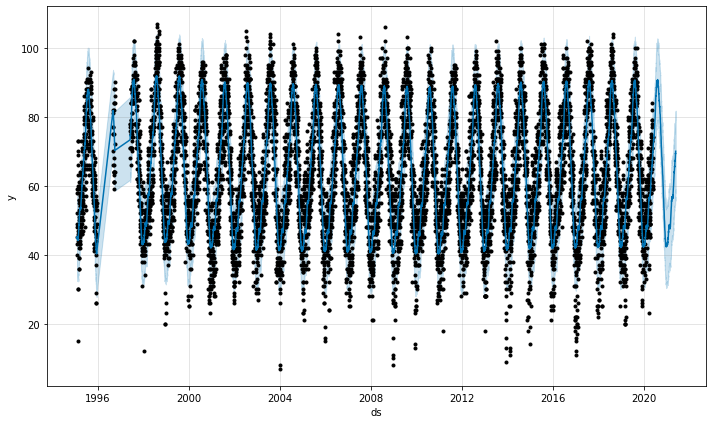

In [136]:
m = Prophet()
m.fit(rdm_keep[['date','tmax']].rename(columns={'date':'ds','tmax':'y'}))
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
fig1 = m.plot(forecast)

In [45]:
rdm_keep[['date','tmax']].rename(columns={'date':'ds','tmax':'y'})

,ds,y
0,1995-02-01,52.0
1,1995-02-02,59.0
2,1995-02-03,58.0
3,1995-02-04,48.0
4,1995-02-05,49.0
...,...,...
8726,2020-05-13,59.0
8727,2020-05-14,59.0
8728,2020-05-15,68.0
8729,2020-05-16,74.0


In [49]:
rec_past = extract_recent_past(rdm_keep, send_date, time_range=5)

In [51]:
rec_past = rec_past[['date','prcp','snow','tmax','tmin']]

In [73]:
rec_past.drop(columns='date').stack().values

array([ 0.,  0., 50., 30.,  0.,  0., 52., 32.,  0.,  0., 44., 29.,  0.,
        0., 45., 30.,  0.,  0., 43., 23.])

In [12]:
def extract_recent_past(df, date, colname='date', time_range=5, units='days'):
    trange = pd.Timedelta(value=time_range, unit=units)
    return df.loc[(df[colname] < date) & (df[colname] >= date - trange)]

In [13]:
def build_train_array(weather_df, ascent_df, time_range=12, features=['date','prcp','snow','tmax','tmin']):
    if 'date' in features:
        feat_per_entry = len(features)-1
    else:
        feat_per_entry = len(features)
    
    feature_array = np.empty(shape=(len(ascent_df),feat_per_entry*time_range))
    feature_array[:] = np.nan
    ascents = ascent_df.values 
    
    for idx, row in zip(tqdm(ascent_df.index),range(len(ascent_df))):
        recent_past = extract_recent_past(weather_df, \
                                          pd.to_datetime(idx),\
                                          time_range=time_range)
        
        recent_past = recent_past[['prcp','snow','tmax','tmin']]
        rp_vals = recent_past.stack().values
        if rp_vals != []:
            try: feature_array[row,:] = rp_vals
            except: print('Oops on row',row)
        #feature_array[row,:] = recent_past.stack().values
        #print(row,recent_past.stack().values)
        
    return feature_array, ascents

In [14]:
daily_ascents = pd.read_pickle('./smith_ascents.pkl')

In [15]:
x,y = build_train_array(rdm_keep, daily_ascents, time_range=5)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:18: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:18: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


Oops on row 117
Oops on row 131
Oops on row 140
Oops on row 141
Oops on row 142
Oops on row 143
Oops on row 146
Oops on row 152
Oops on row 154
Oops on row 155
Oops on row 159
Oops on row 190
Oops on row 192
Oops on row 193
Oops on row 194
Oops on row 195
Oops on row 196
Oops on row 197
Oops on row 198
Oops on row 204
Oops on row 205
Oops on row 206
Oops on row 207
Oops on row 208
Oops on row 210
Oops on row 211
Oops on row 212
Oops on row 213
Oops on row 214
Oops on row 215
Oops on row 216
Oops on row 219
Oops on row 220
Oops on row 221
Oops on row 224
Oops on row 233
Oops on row 234
Oops on row 235
Oops on row 236
Oops on row 237
Oops on row 239
Oops on row 240
Oops on row 241
Oops on row 244
Oops on row 245
Oops on row 246
Oops on row 248
Oops on row 249
Oops on row 250
Oops on row 251
Oops on row 252
Oops on row 253
Oops on row 254
Oops on row 255
Oops on row 256
Oops on row 257
Oops on row 265
Oops on row 266
Oops on row 269
Oops on row 270
Oops on row 271
Oops on row 272
Oops on 

In [39]:
tbn_keep.columns

Index(['station', 'name', 'latitude', 'longitude', 'date', 'prcp', 'snow'], dtype='object')

In [117]:
len(y)

2844

In [16]:
x.shape

(2844, 20)

In [122]:
x[~np.isnan(x).any(axis=1)].shape

(2669, 20)

In [121]:
len(y[~np.isnan(x).any(axis=1)])

2669

In [17]:
def chop_nans(x,y):
    return x[~np.isnan(x).any(axis=1)], y[~np.isnan(x).any(axis=1)]

In [18]:
x,y = chop_nans(x,y)

In [19]:
x.shape, y.shape

((2669, 20), (2669,))

In [20]:
import pickle as pickle

In [21]:
pickle.dump((x,y),open("xy_5day.pkl",mode='wb'))

In [22]:
def build_sendless_array(weather_df, ascent_df, time_range=12, features=['date','prcp','snow','tmax','tmin']):
    if 'date' in features:
        feat_per_entry = len(features)-1
    else:
        feat_per_entry = len(features)
    
    feature_array = np.empty(shape=(len(ascent_df),feat_per_entry*time_range))
    feature_array[:,:] = np.nan
    ascents = ascent_df.values 
    
    for idx, row in zip(ascent_df.index,range(len(ascent_df))):
        recent_past = extract_recent_past(weather_df, \
                                          pd.to_datetime(idx),\
                                          time_range=time_range)
        
        recent_past = recent_past[['prcp','snow','tmax','tmin']]
        rp_vals = recent_past.stack().values
        if rp_vals != []:
            try: feature_array[row,:] = rp_vals
            except: print('Oops on row',row)
        #feature_array[row,:] = recent_past.stack().values
        #print(row,recent_past.stack().values)
        
    return feature_array, ascents

In [134]:
np.shape(x)

(2642, 48)

In [135]:
np.shape(y)

(2642,)

- Match on weather data
- Zero inflated models
- AUC/ROC curves
- time-series model with exogenous variables
- xgboost
- Categorical info
- Multiplicative Seasonality correction
- zeroth order 
- predict increase
- Total users on site



In [23]:
lst = pd.to_datetime(daily_ascents.index)

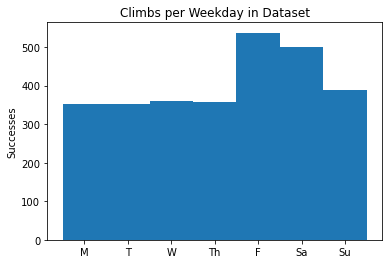

In [42]:
import matplotlib.pyplot as plt

plt.hist(lst.weekday,bins=edges)
plt.title('Climbs per Weekday in Dataset')
plt.ylabel('Successes')
plt.xticks(ticks = [0,1,2,3,4,5,6], labels = ['M','T','W','Th','F','Sa','Su']);

In [37]:
edges = np.array([0,1,2,3,4,5,6,7])-0.5

In [24]:
wkday_prob = (lst.weekday.value_counts()/len(lst.weekday)).sort_index(axis=0)

def gen_new_date(weather_df, weekday_prob):
    # draw a day of the week
    weekday = np.random.choice([0,1,2,3,4,5,6], p = weekday_prob.sort_index(axis=0).values)
    return weather_df[pd.to_datetime(weather_df.date).dt.weekday == weekday].sample(n=1).date

gen_new_date(rdm_keep,wkday_prob)

5915   2012-09-01
Name: date, dtype: datetime64[ns]

In [25]:
def gen_sendfree_list(weather_df, ascent_df, weekday_prob, num=2800):
    #nosend_dates = np.empty(shape=[len(ascent_df),], dtype='datetime64')
    nosend_dates = pd.DataFrame(data = None,
                                columns = None,
                                dtype = 'object')
    #for idx in tqdm(range(len(ascent_df))):
    for idx in tqdm(range(num)):
        new_date = gen_new_date(weather_df, weekday_prob)
        while pd.to_datetime(new_date.array)[0] in pd.to_datetime(ascent_df.index):
            #print(new_date)
            new_date = gen_new_date(weather_df, weekday_prob)
        #nosend_dates.iloc[idx] = new_date.array.date
        nosend_dates = nosend_dates.append({'date':str(pd.to_datetime(new_date.values[0]).date())},ignore_index=True)
    
    newdf = pd.Series(0, index=pd.Index(nosend_dates['date']))
    
    return newdf

In [26]:
weekday = np.random.choice([0,1,2,3,4,5,6], p = wkday_prob.sort_index(axis=0).values)

In [46]:
ns_dates = gen_sendfree_list(rdm_df, daily_ascents, wkday_prob,num=len(daily_ascents))

In [294]:
daily_ascents.index

Index([1970-01-01, 1988-10-06, 1988-10-13, 1988-10-15, 1989-09-30, 1990-09-04,
       1990-09-10, 1990-09-12, 1990-09-26, 1990-09-30,
       ...
       2017-08-07, 2017-08-08, 2017-08-09, 2017-08-10, 2017-08-13, 2017-08-15,
       2017-08-17, 2017-08-18, 2017-08-19, 2017-08-20],
      dtype='object', length=2844)

In [326]:
ns_dates

date
2001-05-05    0
2010-04-18    0
2018-01-31    0
2003-05-12    0
2014-03-11    0
             ..
2000-10-12    0
2012-08-01    0
2017-12-20    0
2003-06-06    0
2017-12-06    0
Length: 2844, dtype: int64

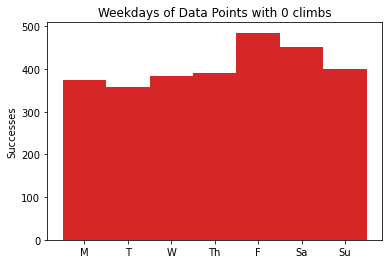

In [48]:
plt.hist(pd.to_datetime(ns_dates.index).weekday, bins=edges, color='tab:red')
plt.title('Weekdays of Data Points with 0 climbs')
plt.ylabel('Successes')
plt.xticks(ticks = [0,1,2,3,4,5,6], labels = ['M','T','W','Th','F','Sa','Su']);

In [28]:
x_no,y_no = build_train_array(rdm_keep, ns_dates, time_range=5)

Oops on row 7
Oops on row 13
Oops on row 23
Oops on row 63


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:18: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


Oops on row 81
Oops on row 82
Oops on row 85
Oops on row 121
Oops on row 153
Oops on row 195
Oops on row 200
Oops on row 213
Oops on row 254
Oops on row 289
Oops on row 296
Oops on row 330
Oops on row 342
Oops on row 362
Oops on row 363
Oops on row 413
Oops on row 425
Oops on row 438
Oops on row 442
Oops on row 457
Oops on row 476
Oops on row 520
Oops on row 531
Oops on row 539
Oops on row 544
Oops on row 545
Oops on row 546
Oops on row 550
Oops on row 574
Oops on row 577
Oops on row 589
Oops on row 595
Oops on row 605
Oops on row 607
Oops on row 611
Oops on row 657
Oops on row 669


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:18: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.


Oops on row 717
Oops on row 741
Oops on row 761
Oops on row 774
Oops on row 817
Oops on row 846
Oops on row 849
Oops on row 921
Oops on row 932
Oops on row 934
Oops on row 973
Oops on row 975
Oops on row 1001
Oops on row 1017
Oops on row 1030
Oops on row 1086
Oops on row 1087
Oops on row 1092
Oops on row 1102
Oops on row 1105
Oops on row 1127
Oops on row 1128
Oops on row 1131
Oops on row 1137
Oops on row 1150
Oops on row 1158
Oops on row 1168
Oops on row 1216
Oops on row 1226
Oops on row 1245
Oops on row 1283
Oops on row 1289
Oops on row 1292
Oops on row 1294
Oops on row 1336
Oops on row 1342
Oops on row 1354
Oops on row 1367
Oops on row 1375
Oops on row 1390
Oops on row 1427
Oops on row 1457
Oops on row 1480
Oops on row 1491
Oops on row 1523
Oops on row 1560
Oops on row 1563
Oops on row 1586
Oops on row 1596
Oops on row 1603
Oops on row 1611
Oops on row 1629
Oops on row 1637
Oops on row 1644
Oops on row 1655
Oops on row 1657
Oops on row 1661
Oops on row 1680
Oops on row 1720
Oops on r

In [29]:
x_no.shape, x.shape

((2844, 20), (2669, 20))

In [323]:
daily_ascents

1970-01-01    2
1988-10-06    1
1988-10-13    1
1988-10-15    1
1989-09-30    1
             ..
2017-08-15    1
2017-08-17    1
2017-08-18    4
2017-08-19    1
2017-08-20    7
Name: date, Length: 2844, dtype: object

In [265]:
#new_date = pd.to_datetime('1970-1-1').date()
new_date.array in daily_ascents.index

False

In [313]:
str(pd.to_datetime(new_date.values[0]).date())

'2009-11-06'

In [256]:
weather_df = rdm_keep
weekday_prob = wkday_prob

new_date = gen_new_date(weather_df, weekday_prob)
new_date.array

<DatetimeArray>
['2009-11-06 00:00:00']
Length: 1, dtype: datetime64[ns]

In [260]:

type(new_date.array.date)

numpy.ndarray

In [263]:
new_date.array.date

array([datetime.date(2009, 11, 6)], dtype=object)

In [383]:
for i in x_no[:,]:
    print(i)

[ 0.    0.   91.   45.    0.    0.   93.   49.    0.    0.   89.   45.
  0.28  0.   92.   47.    0.    0.   88.   50.    0.    0.   88.   42.
  0.    0.   88.   49.    0.    0.   87.   48.    0.    0.   89.   44.
  0.    0.   88.   43.    0.    0.   88.   44.    0.    0.   85.   42.  ]
[ 0.  0. 80. 39.  0.  0. 90. 37.  0.  0. 92. 48.  0.  0. 88. 44.  0.  0.
 91. 44.  0.  0. 94. 45.  0.  0. 98. 45.  0.  0. 97. 48.  0.  0. 88. 48.
  0.  0. 89. 39.  0.  0. 84. 38.  0.  0. 82. 42.]
[ 0.    0.   87.   45.    0.    0.   87.   48.    0.34  0.   67.   46.
  0.    0.   77.   42.    0.    0.   80.   41.    0.    0.   79.   39.
  0.    0.   75.   37.    0.    0.   78.   30.    0.    0.   85.   30.
  0.    0.   92.   34.    0.    0.   87.   42.    0.    0.   82.   41.  ]
[0.0e+00 0.0e+00 5.6e+01 3.1e+01 0.0e+00 0.0e+00 4.1e+01 2.0e+01 0.0e+00
 0.0e+00 4.3e+01 1.4e+01 0.0e+00 0.0e+00 4.4e+01 2.1e+01 0.0e+00 0.0e+00
 4.5e+01 1.6e+01 0.0e+00 0.0e+00 5.3e+01 1.7e+01 0.0e+00 0.0e+00 5.5e+01
 2.7e+01 6.

In [30]:
x_no, y_no = chop_nans(x_no,y_no)

In [31]:
fullx = np.append(x,x_no,axis=0)
fully = np.append(y,y_no,axis=0)

In [32]:
pickle.dump((fullx,fully),open("fullxy_5day.pkl",mode='wb'))

In [379]:
figure
plt.hist(pd.to_datetime(ns_dates.index),bins=3000)

NameError: name 'figure' is not defined

In [366]:
sum(pd.to_datetime(ns_dates.index) in pd.to_datetime(daily_ascents.index))

TypeError: 'bool' object is not iterable

In [378]:
sum([pd.to_datetime(ns_dates.index)[i] in pd.to_datetime(daily_ascents.index) for i in range(len(ns_dates))])
 
 

0

In [1]:
(lst.weekday.value_counts()/len(lst.weekday)).sort_index(axis=0)

NameError: name 'lst' is not defined